# Assignment 5
## Machine Learning Fashionista 2.0
### Import & Format Data
First, I formatted the images using code from the `load_images.py` file given in the Session 7 Pre-Class Work.

In [1]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# resize and crop images

def resize_images(images):
    '''
    Resizes and crops images using the function given
    in the Session 7 repo from load_images.py.
    '''    

    flattened = []
    # for each image path
    for path in images:
        # open it as a read file in binary mode
        with open(path, 'r+b') as f:
            # open it as an image
            with Image.open(f) as image:
                # resize the image to be more manageable
                cover = resizeimage.resize_cover(image, [64, 64])
                # flatten the matrix to an array and 
                # append it to all flattened images
                flattened.append((np.array(cover).flatten(), 0))


    # Flatten it once more
    flattened = np.asarray(flattened)

    # Declare which are the X and Y inputs
    X = flattened[:,0]
    Y = flattened[:,1]

    # Use np.stack to put the data into the right dimension
    X = np.stack(i for i in X)
    Y = np.stack(i for i in Y)
    
    # return resized images
    return X, Y

In [3]:
# import and resize images

shirts = glob('clothing/shirts/*')
jerseys = glob('clothing/jerseys/*')

shirts_img = resize_images(shirts)[0]
jerseys_img = resize_images(jerseys)[0]

/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# assign binary classifications
shirt = np.zeros((len(shirts_img), 1)) # shirt = 0
jersey = np.ones((len(jerseys_img), 1)) # jersey = 1

# append binary classifications to images
shirt_data = np.append(shirts_img, shirt, axis=1)
jersey_data = np.append(jerseys_img, jersey, axis=1)

# combine shirt and jersey data into one dataset
data = np.concatenate((shirt_data, jersey_data))
print(data.shape)

# create dataframe
df = pd.DataFrame(data)
df = df.rename(columns={df.columns[-1]: 'Type'})

(2791, 12289)


### Support Vector Machines (SVM)
First, I split the dataset into 80% training data and 20% testing data.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics.pairwise import linear_kernel, \
polynomial_kernel, rbf_kernel
from sklearn.metrics import classification_report, plot_confusion_matrix, \
accuracy_score

In [6]:
# use all but 'Type' as independent variables
X = df.drop(columns='Type')

# use 'Type' as dependent variable
y = df['Type']

# split into train and test data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state=0)

#### Linear SVM Model
I generated an SVM classification model using a linear kernel.

In [7]:
# create the classifier
svm_linear = svm.SVC(kernel='linear')

# fit the classifier to the training data
svm_linear.fit(X_train,y_train)

# predict the labels of the test set
y_pred_linear = svm_linear.predict(X_test)

In [8]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_linear))

# ccompute and print accuracy scores and error rates
score_train_linear = np.round(svm_linear.score(X_train, y_train),3)
score_test_linear = np.round(svm_linear.score(X_test, y_test),3)

print(f'Accuracy Score (Train): {score_train_linear}')
print(f'Accuracy Score (Test): {score_test_linear}')
print(f'Error Rate (Train): {1-score_train_linear}')
print(f'Error Rate (Test): {1-score_test_linear}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61       307
         1.0       0.52      0.48      0.49       252

    accuracy                           0.56       559
   macro avg       0.56      0.55      0.55       559
weighted avg       0.56      0.56      0.56       559

Accuracy Score (Train): 0.975
Accuracy Score (Test): 0.562
Error Rate (Train): 0.025000000000000022
Error Rate (Test): 0.43799999999999994


#### Polynomial SVM Model
I generated an SVM classification model using a polynomial kernel with 2 degrees.

In [9]:
# create the classifier
svm_poly = svm.SVC(kernel='poly', degree=2)

# fit the classifier to the training data
svm_poly.fit(X_train,y_train)

# predict the labels of the test set
y_pred_poly = svm_poly.predict(X_test)

In [10]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_poly))

# ccompute and print accuracy scores and error rates
score_train_poly = np.round(svm_poly.score(X_train, y_train),3)
score_test_poly = np.round(svm_poly.score(X_test, y_test),3)

print(f'Accuracy Score (Train): {score_train_poly}')
print(f'Accuracy Score (Test): {score_test_poly}')
print(f'Error Rate (Train): {1-score_train_poly}')
print(f'Error Rate (Test): {1-score_test_poly}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66       307
         1.0       0.58      0.52      0.55       252

    accuracy                           0.61       559
   macro avg       0.61      0.61      0.61       559
weighted avg       0.61      0.61      0.61       559

Accuracy Score (Train): 0.881
Accuracy Score (Test): 0.614
Error Rate (Train): 0.119
Error Rate (Test): 0.386


#### RBF SVM Model
I generated an SVM classification model using an RBF (Radial Basis Function) kernel.

In [11]:
# create the classifier
svm_rbf = svm.SVC(kernel='rbf')

# fit the classifier to the training data
svm_rbf.fit(X_train,y_train)

# predict the labels of the test set
y_pred_rbf = svm_rbf.predict(X_test)

In [12]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_rbf))

# ccompute and print accuracy scores and error rates
score_train_rbf = np.round(svm_rbf.score(X_train, y_train),3)
score_test_rbf = np.round(svm_rbf.score(X_test, y_test),3)

print(f'Accuracy Score (Train): {score_train_rbf}')
print(f'Accuracy Score (Test): {score_test_rbf}')
print(f'Error Rate (Train): {1-score_train_rbf}')
print(f'Error Rate (Test): {1-score_test_rbf}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70       307
         1.0       0.63      0.58      0.60       252

    accuracy                           0.66       559
   macro avg       0.65      0.65      0.65       559
weighted avg       0.66      0.66      0.66       559

Accuracy Score (Train): 0.823
Accuracy Score (Test): 0.658
Error Rate (Train): 0.17700000000000005
Error Rate (Test): 0.34199999999999997


### Deep Neural Networks

I created an neural network model using an the VGG16 neural network model. This model has 16 layers. The first 13 layers are convolutional with 3 dense layers at the end. This network was trained on an image database called ImageNet, which categorizes images. 

During training, the last layer is adjusted according to the error gradient. For every other layer, we can solve for the derivative of the weights with respect to the error on the last layer using the chain rule.

In [59]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, \
decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers, models
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

#### Split Data

In [14]:
# split data into 80% training, 20% validating data
img_data = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# use path containing folders 'shirts' and 'jerseys' images
path = 'clothing'
train = img_data.flow_from_directory(path, class_mode="binary", 
                                    target_size=(224,224), 
                                    subset="training")
test = img_data.flow_from_directory(path, class_mode="binary", 
                                   target_size=(224,224), 
                                   subset="validation")

Found 2233 images belonging to 2 classes.
Found 558 images belonging to 2 classes.


#### Define Model

In [15]:
# define VGG16 model
VGG16_model = VGG16(include_top=False, weights='imagenet', 
                    input_shape=(224,224,3))
VGG16_model.trainable = False
VGG16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
# add prediciton dense layer with sigmoid activation function
flattened_layers = layers.Flatten()
prediction_layer = layers.Dense(1, activation='sigmoid')

# define final model
model = models.Sequential([VGG16_model, flattened_layers, prediction_layer])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


#### Compile Model
I compiled the model using the binary cross entropy loss function because there are two possible classes (binary variables): shirt or jersey. Binary crosss entropy compares actual class 0 or 1 to the the predicted probabilites and minimizes the error.

In [17]:
# compile model
model.compile(optimizer="adam", loss="binary_crossentropy", 
              metrics=["accuracy"])

#### Fit Model

In [18]:
# fit model
history = model.fit(train, validation_data=test, epochs=15)

Epoch 1/15
70/70 [==============================] - 328s 5s/step - loss: 0.6081 - accuracy: 0.6803 - val_loss: 0.5687 - val_accuracy: 0.7133
Epoch 2/15
70/70 [==============================] - 334s 5s/step - loss: 0.4253 - accuracy: 0.7949 - val_loss: 0.4406 - val_accuracy: 0.7993
Epoch 3/15
70/70 [==============================] - 342s 5s/step - loss: 0.3199 - accuracy: 0.8733 - val_loss: 0.4766 - val_accuracy: 0.7616
Epoch 4/15
70/70 [==============================] - 343s 5s/step - loss: 0.3156 - accuracy: 0.8692 - val_loss: 0.4842 - val_accuracy: 0.8136
Epoch 5/15
70/70 [==============================] - 1120s 16s/step - loss: 0.2502 - accuracy: 0.9073 - val_loss: 0.6172 - val_accuracy: 0.6953
Epoch 6/15
70/70 [==============================] - 2469s 35s/step - loss: 0.2134 - accuracy: 0.9239 - val_loss: 0.5673 - val_accuracy: 0.7366
Epoch 7/15
70/70 [==============================] - 419s 6s/step - loss: 0.1954 - accuracy: 0.9355 - val_loss: 0.5130 - val_accuracy: 0.7903
Epoch 8/1

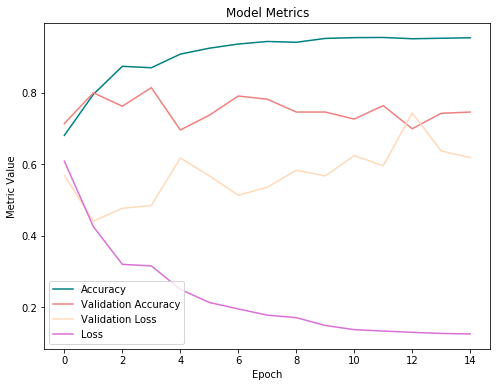

In [60]:
plt.figure(figsize=(8,6))

# plot metrics over epochs
plt.plot(history.history['accuracy'], color='teal')
plt.plot(history.history['val_accuracy'], color='lightcoral')
plt.plot(history.history['val_loss'], color='peachpuff')
plt.plot(history.history['loss'], color='orchid')


plt.title('Model Metrics')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend(['Accuracy','Validation Accuracy','Validation Loss', 'Loss'])

plt.show()

In [52]:
score_neural = np.round(history.history['accuracy'][-1],3)

print(f'Accuracy Score: {score_neural}')
print(f'Error Rate: {1-score_neural}')

Accuracy Score: 0.953
Error Rate: 0.04700000000000004


### Comparison

In [53]:
# print results from all 3 model variations
results = ({'Model': ['Linear SVM', 'Poly SVM', 'RBF SVM', 'VGG16'],
           'Training Error': [1-score_train_linear, 1-score_train_poly, 
                              1-score_train_rbf, 1-score_neural],
            'Testing Error': [1-score_test_linear, 1-score_test_poly, 
                              1-score_test_rbf, 1-score_neural]
           })

results_df = pd.DataFrame(results)
results_df

,Model,Training Error,Testing Error
0,Linear SVM,0.025,0.438
1,Poly SVM,0.119,0.386
2,RBF SVM,0.177,0.342
3,VGG16,0.047,0.047


Both Support Vector Machines (SVMs) and Neural Networks (NNs) can be used to classify data into different categories. In this case, those categories are shirts and jerseys. SVMs separate data into classes by finding the hyperplane that best separates the classes. NNs can classify more complex problems with activation functions through hidden layers. Both methods can be used with non-linear functions, but NNs optimize using the gradient descent algorithm, while SVMs do not. NNs also take much longer to train. 

As seen in the results above, Linear SVM overfit while training with an extremely low error rate, resulting in a higher testing error rate. Polynomial SVM and RBF SVM performed similarly, but the VGG16 NN model had the lowest error rate of all of them. Therefor, the VGG16 NN model is superior in this case.